# Off-TD(0) and Emphatic-TD(0) on a five states model

For this example, we will be working on the model defined by Sutton below :

<img src="../docs/five_states.png">

We want to estimate the value of each state under the policy $\pi$ while behaving under $\mu$. This is an off-learning problem. You can quickly verify that the value under $\pi$ is $v_\pi = (4, 3, 2, 1, 1)$.

We want to compare the off-TD and the emphatic-TD of Sutton on this example. To do so, we are going to use the class "comparatorTD" that will help us to compute and plot results for each algorithm.

## Imports

In [1]:
# Usual imports
import numpy as np
import matplotlib.pyplot as plt

# Import the library folder to Python libraries.
import sys
sys.path.insert(0, "../library/") # Path of the library

# Library imports
from TD import EmphaticTD, OffTD # the algorithm to use
from models import Model # The class to define our model
from policies import Policy, LeftRightPolicy, RandomPolicy # All the policies available for such model
from utils import comparatorTD # Tool to evaluate the TD algorithms on a model

In [2]:
# To make nice plot for Latex
%matplotlib notebook
plt.rcParams.update({'font.size': 13}) # for Latex
plt.rcParams['figure.figsize'] = [8, 5]

## Quick definition of the model

In [3]:
# Define the model
model = Model(
            ## Model definition
                # features function
                features = [[1, 0, 0],
                            [1, 1, 0],
                            [0, 1, 0],
                            [0, 1, 1],
                            [0, 0, 1]], 
                R = np.ones((5,5)), # transition reward
                pi = LeftRightPolicy(p_right = 1), # target policy
                mu = LeftRightPolicy(p_left = 2/3), # behavior policy
                v_pi = [4, 3, 2, 1, 1], # state value under pi
    
            ## Parameters for TD
                I = np.ones(5), # interest function
                discounts = [0, 1, 1, 1, 0], # discount function
    
            ## Initialisation
                S0 = 0,
                theta0 = np.zeros(3),
             ) 

## Building the comparator

A comparator is easy to define just give the algorithm you want to use and some plot characteristics if you want.

In [4]:
# The algorithm you want to compare
off = OffTD(alpha = 0.001, lambdas=0)
emp = EmphaticTD(alpha = 0.001, lambdas=0)
algos = [off, emp]

# The tool to compare quickly
comparator = comparatorTD(algos, colors = ["red", "blue"], names = ["OffTD", "EmphaticTD"])

## Run the comparator

In [5]:
comparator.run(model, T = 20000, N = 100)

offTD has been computed for 20000 steps and 100 particles.
emphatic TD has been computed for 20000 steps and 100 particles.


## Plot the MSVE

<IPython.core.display.Javascript object>


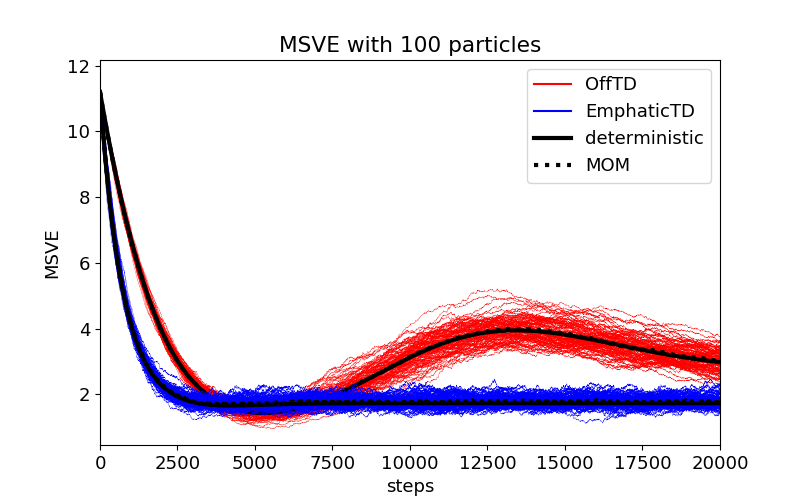

In [6]:
comparator.plot_msve(particles=True, mom = True, optimal=True)

As you can see both algorithm do not converge to zero. This is because the features are of dimension 3 while there are 5 states. Thus, it is not solvable perfectly. You can compute what is the theoric minimum of this function by using the Model class.

## Theoritical limit

As you can see below, the minimum theoric of the MSVE is 0.67. Then it is expected that both algorithms wont converge to zero. Also you can see that they do not converge toward the same $\theta$.

In [7]:
x_min, y_min = model.msve_min()
off_limit = off.optimal(model)
emp_limit = emp.optimal(model)

print("MSVE :")
print("\t Minimum : {}".format(y_min))
print("\t Theta optimal : {}".format(x_min))
print("\t Theta Emphatic limit : {}".format(emp_limit))
print("\t Theta Off limit : {}".format(off_limit))

MSVE :
	 Minimum : 0.6652329749109103
	 Theta optimal : [3.57777745 0.26666733 0.82222322]
	 Theta Emphatic limit : [2.27183992 0.90775988 0.12152269]
	 Theta Off limit : [ 2.17241379 -0.4137931   1.27586207]


## Plot one dimension of $\theta$

<IPython.core.display.Javascript object>


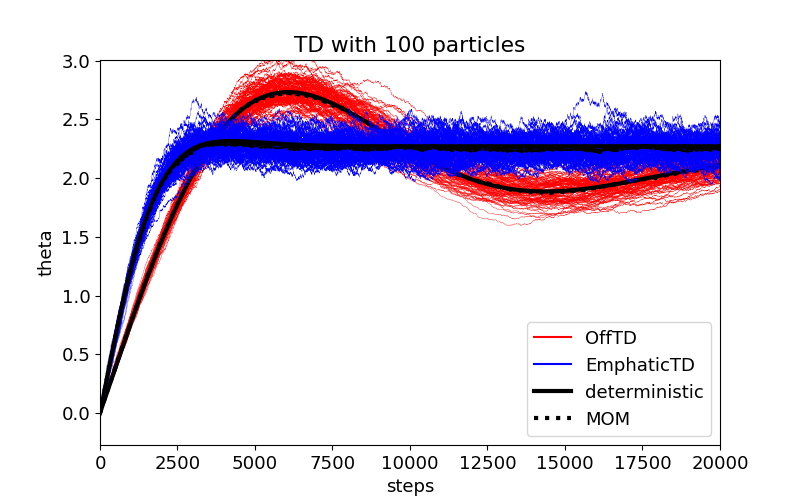

In [8]:
i = 0
comparator.plot_theta(i, particles=True, mom = True, optimal=True)

# Conclusion

The comparator is a usefull class to first plot your result but also to compare algorithm very quickly.

It can use a lot of memory if you compute a lot of particles. Thus if you want to compare multiple model, you should use the same comparator as it will only store the particles of your current model.